In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline


In [2]:
data = pd.read_csv('table_8_offenses_known_to_law_enforcement_florida_by_city_2013.csv', sep=None, thousands=',', engine='python')[4:294]
# data.head()


data.drop(['Unnamed: 13', 'Unnamed: 5'], 1, inplace=True)

data = data.replace(np.nan, '0')
# data = data.dropna(axis=0)



data.columns = ['City', 'Population', 'Violent Crime', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault', 
                'Property Crime', 'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']



# print(city)

# city = data['City']

population = data['Population']
violent_crime = data['Violent Crime']
murder = data['Murder']
rape = data['Rape']
robbery = data['Robbery']
agg_assault = data['Aggravated Assault']
prop_crime = data['Property Crime']
burglary = data['Burglary']
larceny = data['Larceny']
vehicle_theft = data['Vehicle Theft']
arson = data['Arson']

features = pd.get_dummies(population, columns=None)
crime = pd.get_dummies(population)
city = pd.get_dummies(population)

data.drop(['City'], 1, inplace=True)

features.drop(features.columns, axis=1, inplace=True)

city['Population'] = data['Population']

# city['Population'] = (np.where(data['Population'].values.astype(int) > 100000, 1, 0))
features['Violent_Crime'] = (np.where(data['Violent Crime'].values.astype(int) > violent_crime.values.astype(int).mean(), 1, 0))
features['Murder'] = (np.where(data['Murder'].values.astype(int) > murder.values.astype(int).mean(), 1, 0))
features['Rape'] = (np.where(data['Rape'].values.astype(int) > rape.values.astype(int).mean(), 1, 0))
features['Robbery'] = (np.where(data['Robbery'].values.astype(int) > robbery.values.astype(int).mean(), 1, 0))
features['Aggravated_Assault'] = (np.where(data['Aggravated Assault'].values.astype(int) > agg_assault.values.astype(int).mean(), 1, 0))
features['Property_Crime'] = (np.where(data['Property Crime'].values.astype(int) > prop_crime.values.astype(int).mean(), 1, 0))
features['Burglary'] = (np.where(data['Burglary'].values.astype(int) > burglary.values.astype(int).mean(), 1, 0))
features['Larceny'] = (np.where(data['Larceny'].values.astype(int) > larceny.values.astype(int).mean(), 1, 0))
features['Vehicle_Theft'] = (np.where(data['Vehicle Theft'].values.astype(int) > vehicle_theft.values.astype(int).mean(), 1, 0))
features['Arson'] = (np.where(data['Arson'].values.astype(int) > arson.values.astype(int).mean(), 1, 0))

# print(features['Large_City'])


# crime['Violent_Crime'] = (np.where(data['Violent Crime'].values.astype(int) > violent_crime.values.astype(int).mean(), 1, 0))

crime['Violent_Crime'] = data['Violent Crime'].astype(int).dropna()

# features.shape
print(features)



     Violent_Crime  Murder  Rape  Robbery  Aggravated_Assault  Property_Crime  \
4                0       0     0        0                   0               0   
5                0       0     0        0                   0               1   
6                0       0     0        0                   0               0   
7                0       0     0        0                   0               0   
8                0       0     0        1                   0               1   
9                0       1     0        0                   0               0   
10               0       0     0        0                   0               0   
11               0       0     0        0                   0               0   
12               0       0     0        0                   0               0   
13               0       0     1        0                   0               0   
14               0       0     0        0                   0               1   
15               0       0  

--- 3.409385681152344e-05 seconds ---


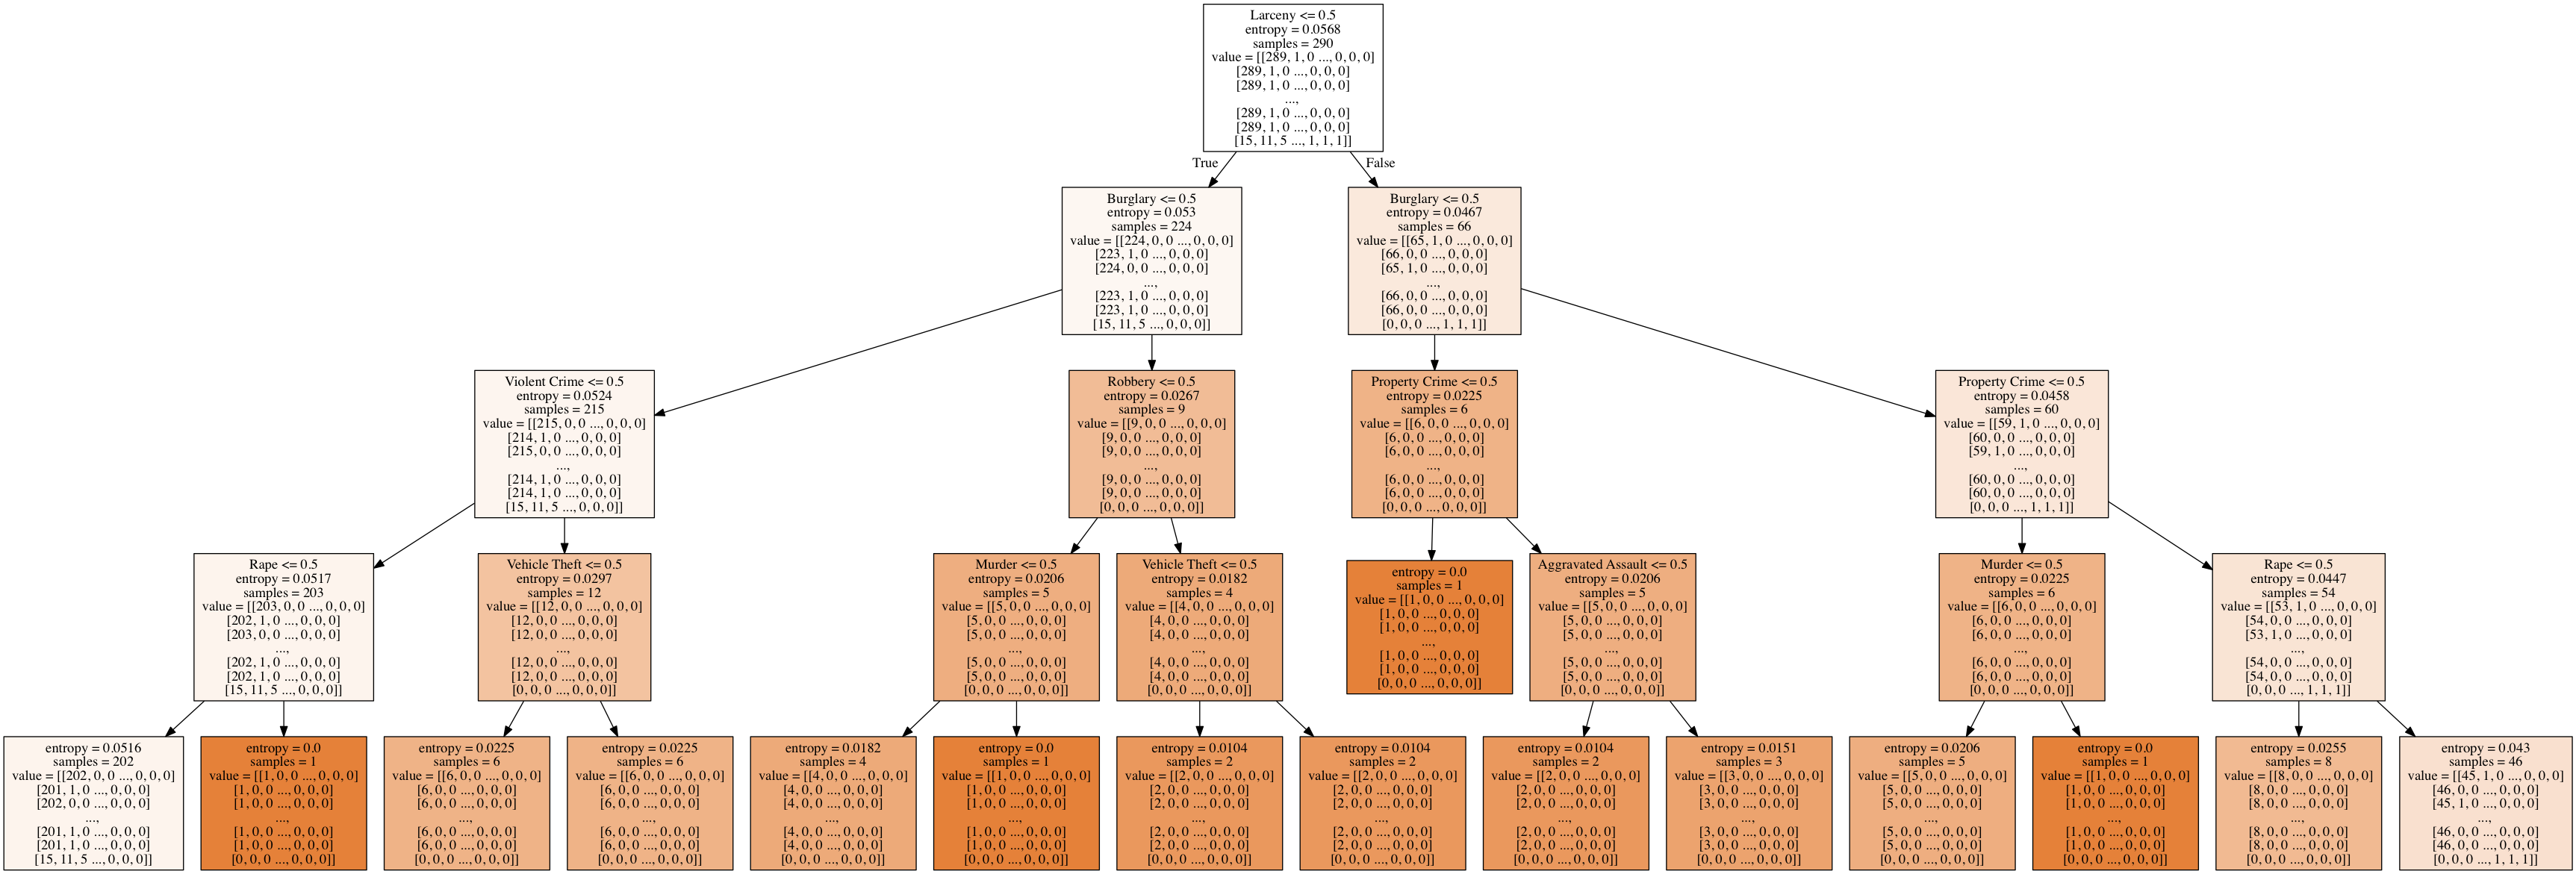

In [7]:
import time
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
#     random_state = 1337
)
decision_tree.fit(features, crime)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=data.columns,
    class_names=['Crime', 'Violent Crime'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



In [4]:
# getting distinct types
categorical = data.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Population
287
Violent Crime
154
Murder
20
Rape
53
Robbery
93
Aggravated Assault
139
Property Crime
258
Burglary
183
Larceny
237
Vehicle Theft
109
Arson
24


In [5]:
pd.get_dummies(data)
# print(data)

,Population_100725,Population_1025,Population_102510,Population_10290,Population_10318,Population_103971,Population_104391,Population_10446,Population_10689,Population_10694,...,Arson_30,Arson_4,Arson_5,Arson_51,Arson_6,Arson_7,Arson_81,Arson_89,Arson_9,Arson_97
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))
rfc = ensemble.RandomForestClassifier()
X = features.drop('Violent_Crime', 1)
Y = features['Violent_Crime']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

--- 3.814697265625e-05 seconds ---


array([ 1.        ,  1.        ,  1.        ,  0.96551724,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])